In [1]:
import numpy as np
import os
import pandas as pd
import phenograph
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from src.segmented_svc.segmented_svc import SegmentedSVC

test_df = pd.read_csv(os.path.join("test", "flow_cytometry_test_data.csv")).fillna(0).sample(frac=0.7)

In [13]:
big_run = pd.read_csv("big_run.csv")
big_run['database size'] = big_run['database size']/1000
big_run = big_run.set_index('database size')

Text(0.5, 0, 'Data Size (thousands of rows)')

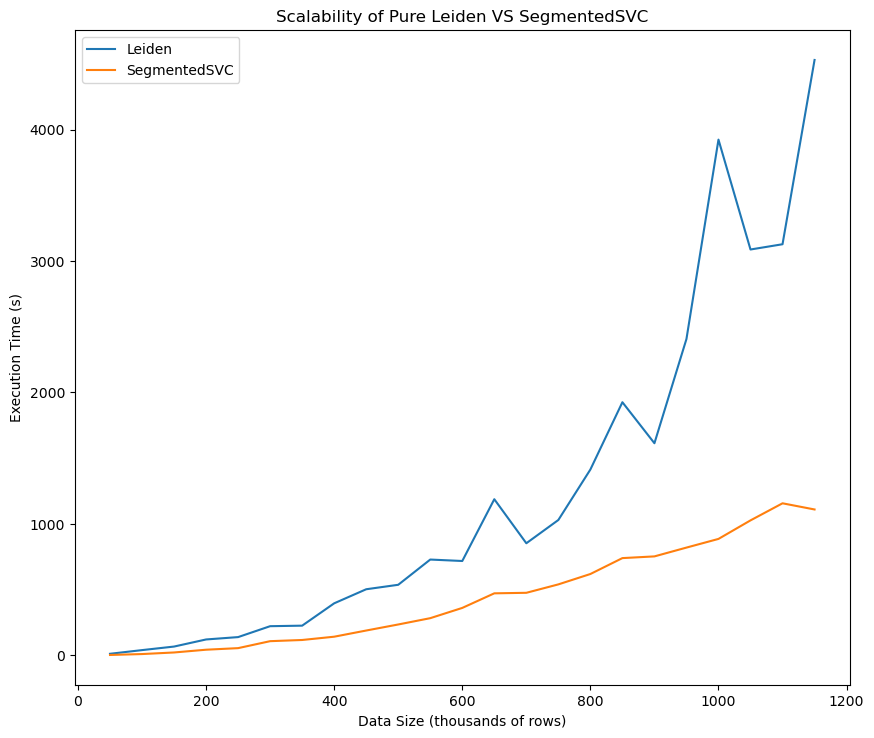

In [20]:
big_run.plot(figsize=(10,8.5))
plt.title("Execution of Pure Leiden VS SegmentedSVC")
plt.ylabel('Execution Time (s)')
plt.xlabel('Data Size (thousands of rows)')

Text(0.5, 0, 'Data Size (thousands of rows)')

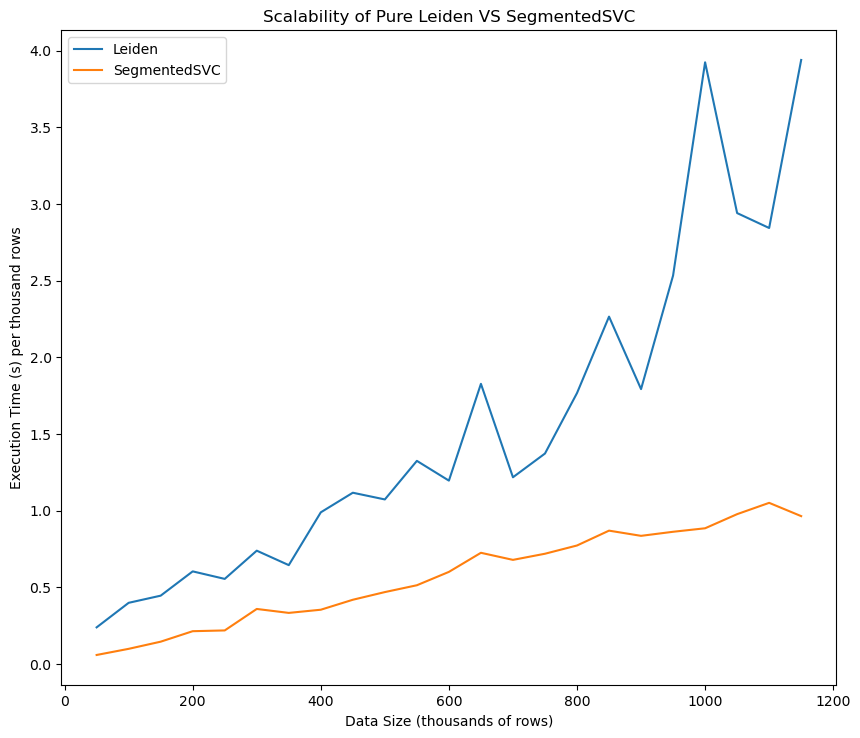

In [23]:
big_run = pd.read_csv("big_run.csv")
big_run['database size'] = big_run['database size']/1000
big_run['Leiden'] = big_run['Leiden']/big_run['database size']
big_run['SegmentedSVC'] = big_run['SegmentedSVC']/big_run['database size']
big_run = big_run.set_index('database size')
big_run.plot(figsize=(10,8.5))
plt.title("Scalability of Pure Leiden VS SegmentedSVC")
plt.ylabel('Execution Time (s) per thousand rows')
plt.xlabel('Data Size (thousands of rows)')

In [12]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(test_df)

In [13]:
# Clustering the whole dataset

communities, graph, Q  = phenograph.cluster(
    scaled_df,
    clustering_algo = "leiden",
    )

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 142.11071395874023 seconds
Jaccard graph constructed in 33.90475845336914 seconds
Running Leiden optimization
Leiden completed in 1598.4098012447357 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1788.0245592594147 seconds


In [14]:
communities.max()

32

In [15]:
# We can use the SegmentedSVC to do the same computation in less time

#   We need to use unscaled data because the SegmentedSVC object 
# will train and use its own

train_data, test_data, train_labels, test_labels = train_test_split(test_df.values,
                                                                    communities,
                                                                    train_size=0.8
                                                                    )

celestia_object = SegmentedSVC(
    data = train_data,
    labels = train_labels
)

In [16]:
predicted_labels = celestia_object.predict(test_data)
predicted_labels

array([ 5.,  1., 11., ...,  6.,  1., 23.])

In [17]:
report = classification_report(test_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     15440
           1       0.95      0.96      0.96     13699
           2       0.95      0.95      0.95     12246
           3       0.94      0.93      0.93     11347
           4       0.96      0.96      0.96     10612
           5       0.98      0.98      0.98      9992
           6       0.93      0.96      0.94      7957
           7       0.95      0.94      0.95      7481
           8       0.94      0.94      0.94      6996
           9       0.93      0.91      0.92      6179
          10       0.96      0.97      0.96      5756
          11       0.96      0.95      0.96      4823
          12       0.97      0.97      0.97      4180
          13       0.97      0.98      0.97      3744
          14       0.95      0.95      0.95      3311
          15       0.95      0.91      0.93      2430
          16       0.98      0.99      0.99      2199
          17       0.97    

In [18]:
# It also works just fine with a small train set

train_data, test_data, train_labels, test_labels = train_test_split(
    test_df.values, 
    communities, 
    train_size=0.2
    )

celestia_object = SegmentedSVC(
    data = train_data,
    labels = train_labels
)

predicted_labels = celestia_object.predict(test_data)
predicted_labels

report = classification_report(test_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     61450
           1       0.94      0.96      0.95     54483
           2       0.93      0.95      0.94     49731
           3       0.93      0.92      0.92     45231
           4       0.95      0.95      0.95     43049
           5       0.97      0.98      0.98     40150
           6       0.91      0.95      0.93     31786
           7       0.94      0.92      0.93     29918
           8       0.94      0.91      0.92     27864
           9       0.91      0.88      0.90     24964
          10       0.95      0.96      0.96     23035
          11       0.96      0.94      0.95     19051
          12       0.95      0.96      0.96     16477
          13       0.95      0.97      0.96     14615
          14       0.94      0.93      0.94     13582
          15       0.94      0.88      0.91      9552
          16       0.97      0.98      0.98      8842
          17       0.96    